# Temporal (3 Chunk) Analysis of Chat Level Features 

In [80]:
from features.positivity_zscore import *
from features.lexical_features_v2 import *
from utils.summarize_chat_level_features import *
from utils.assign_chunk_nums import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
def preprocess_conversation_columns(df):
	# remove all special characters from df
	df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
	
	# If data is grouped by batch/round, add a conversation num
	if {'batch_num', 'round_num'}.issubset(df.columns):
		df['conversation_num'] = df.groupby(['batch_num', 'round_num']).ngroup()
		df = df[df.columns.tolist()[-1:] + df.columns.tolist()[0:-1]] # make the new column first

	return(df)

def get_average(chat_level_data, column_to_summarize, new_column_name):
	grouped_conversation_data = get_count_dataframe(chat_level_data, column_to_summarize)
	grouped_conversation_data[new_column_name] = grouped_conversation_data.groupby([["conversation_num", "chunk_num"]], sort=False)[column_to_summarize].transform(lambda x: np.mean(x))
	return(grouped_conversation_data[["conversation_num", "chunk_num", new_column_name]].drop_duplicates())

def get_count_dataframe(chat_level_data, on_column, speaker_id = "speaker_nickname"):
	grouped_conversation_data = chat_level_data[["conversation_num", "chunk_num", speaker_id, on_column]].groupby(["conversation_num", speaker_id]).sum().reset_index() 
    # gets this dataframe:
	# Batch# Round# Speaker  Total Number of Words
	# 0 	 1      Priya    100
	# 0      1      Yuluan   90
	return(grouped_conversation_data)

def plot_dd_results(dd_results):
	for col in dd_results:
		if (col != 'conversation_num') & (col !='chunk_num'):
			plt.figure(figsize=(12, 6))
			for conversation_num, group in dd_results.groupby('conversation_num'):
				plt.plot(group['chunk_num_plt'], group[col], label=f'Conversation {conversation_num}')

			plt.xlabel('Chunk Number (Each contains third of chats)')
			plt.ylabel(col)
			plt.title(col + ' over time')
			print(col)
			plt.show()
    

In [82]:
df = pd.read_csv('data/raw_data/jury_conversations_with_outcome_var.csv')
df = preprocess_conversation_columns(df)
df = df.dropna()

In [103]:
liwc = assign_chunk_nums(pd.concat([df['conversation_num'], liwc_features(df)], axis = 1), 4)
liwc_chunk_avg = liwc.groupby(['conversation_num', 'chunk_num']).apply(lambda x: x.mean())

In [106]:
# liwc_chunk_avg = liwc_chunk_avg.drop('conversation_num', axis=1)
liwc_chunk_avg = liwc_chunk_avg.reset_index(drop=True)
liwc_chunk_avg['chunk_num_plt'] = liwc_chunk_avg.groupby('conversation_num').cumcount() + 1
# plot_dd_results(liwc_chunk_avg)

discrepancies


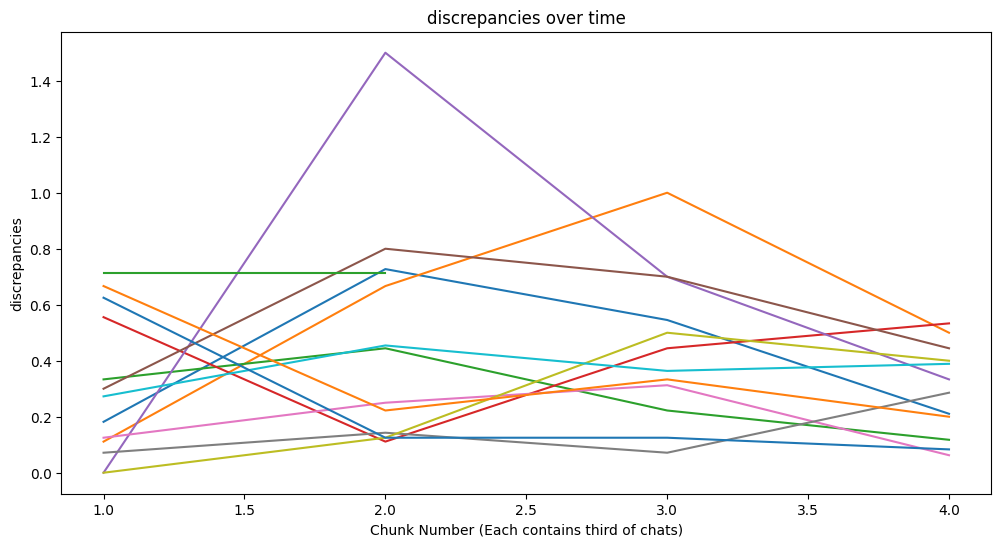

hear


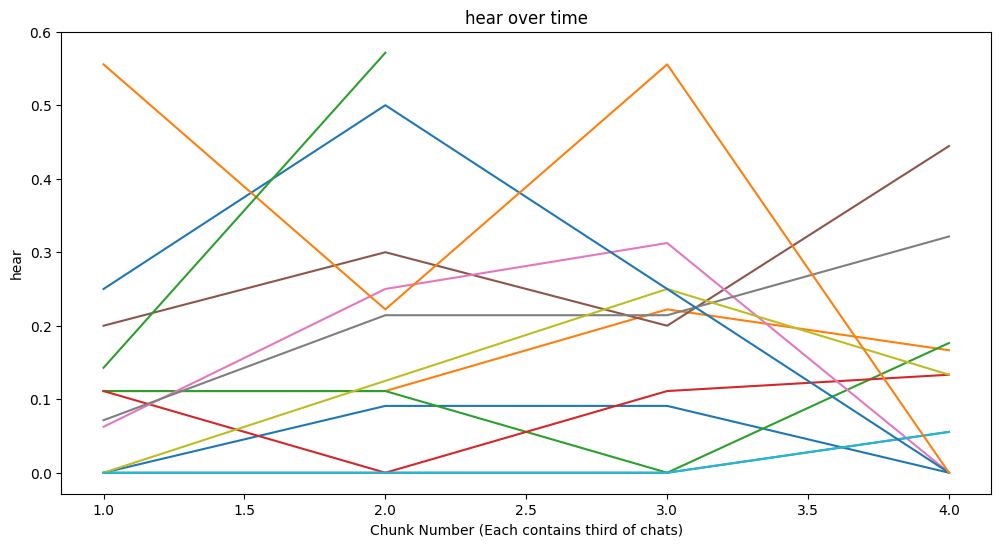

home


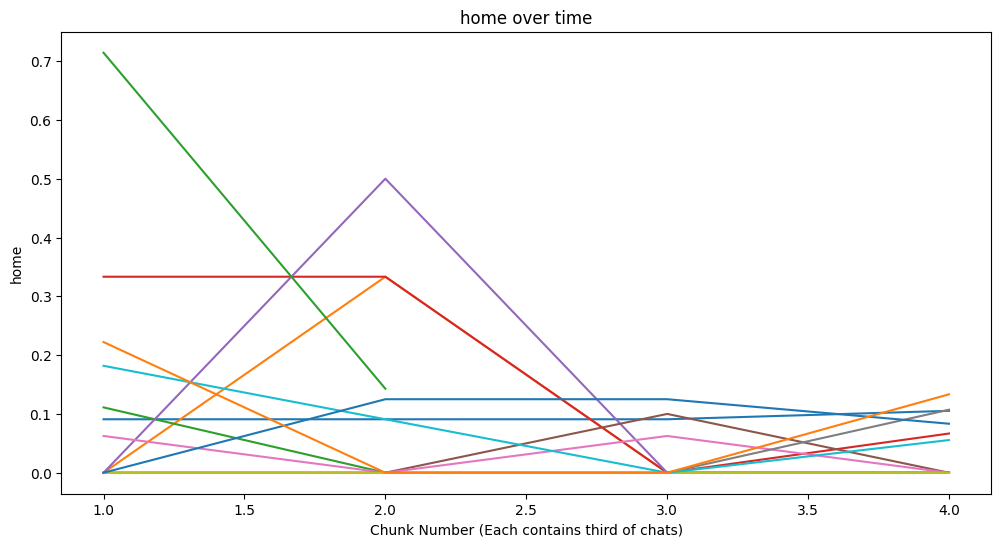

conjunction


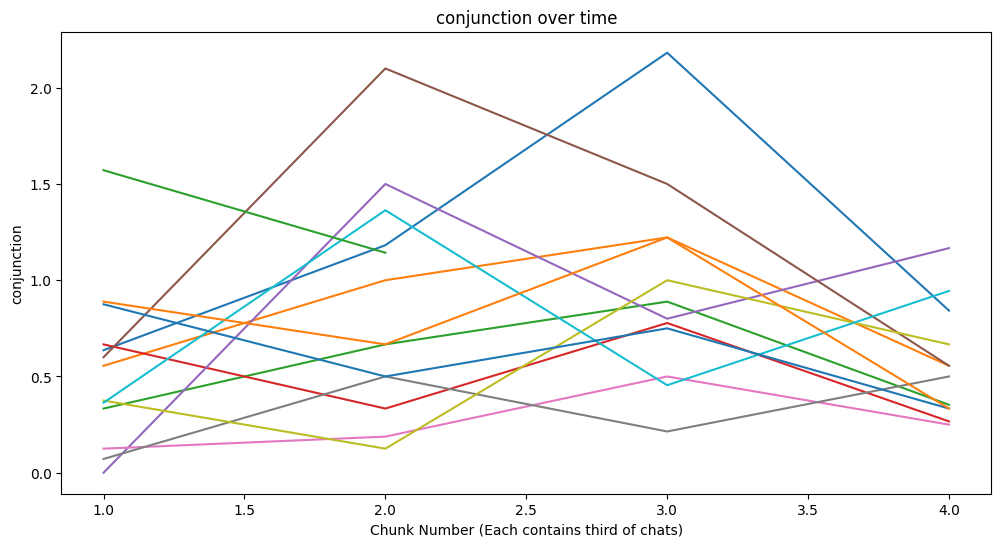

certainty


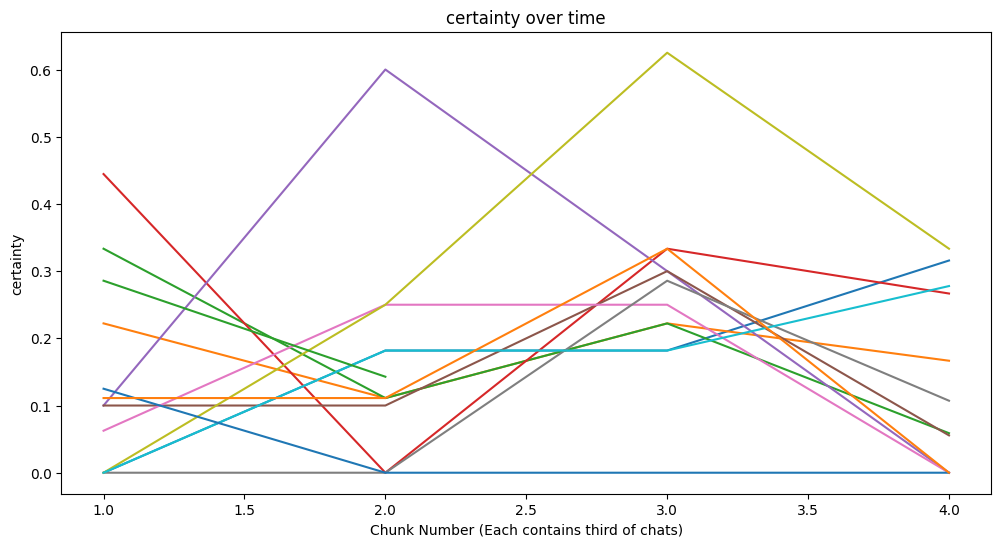

inclusive


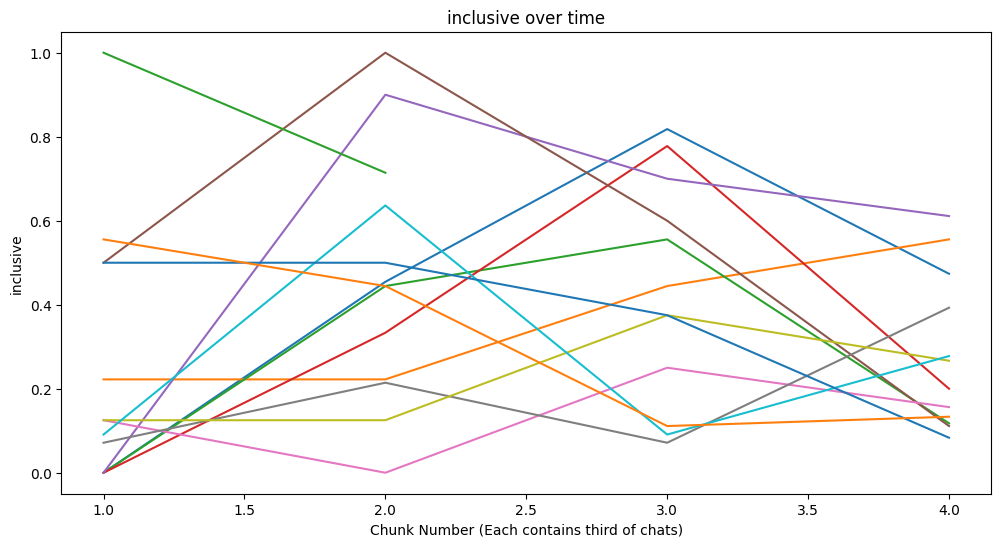

bio


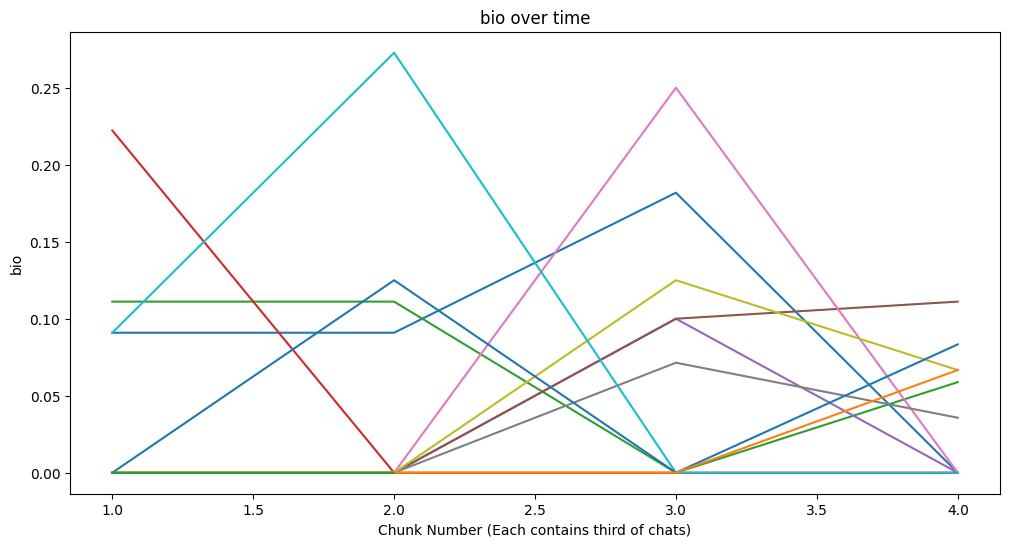

achievement


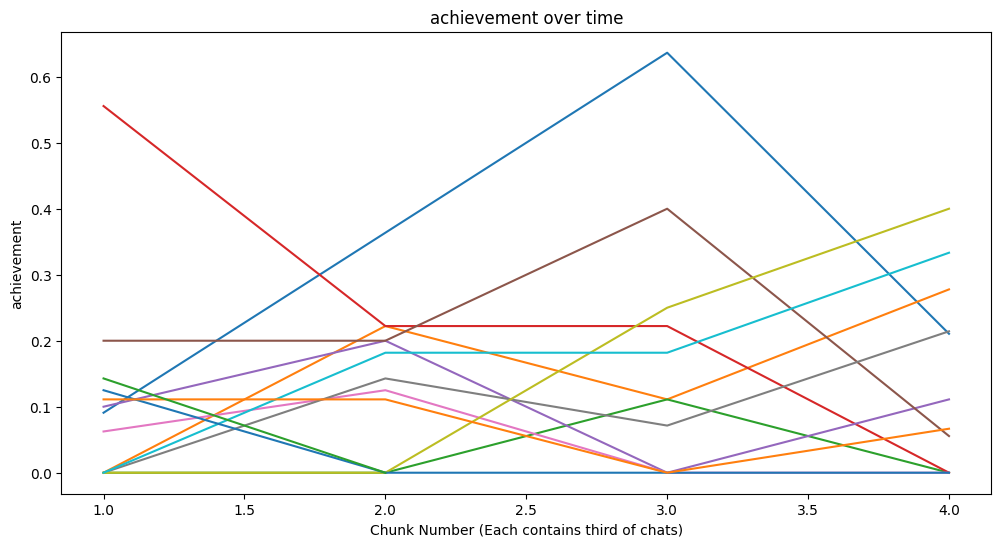

adverbs


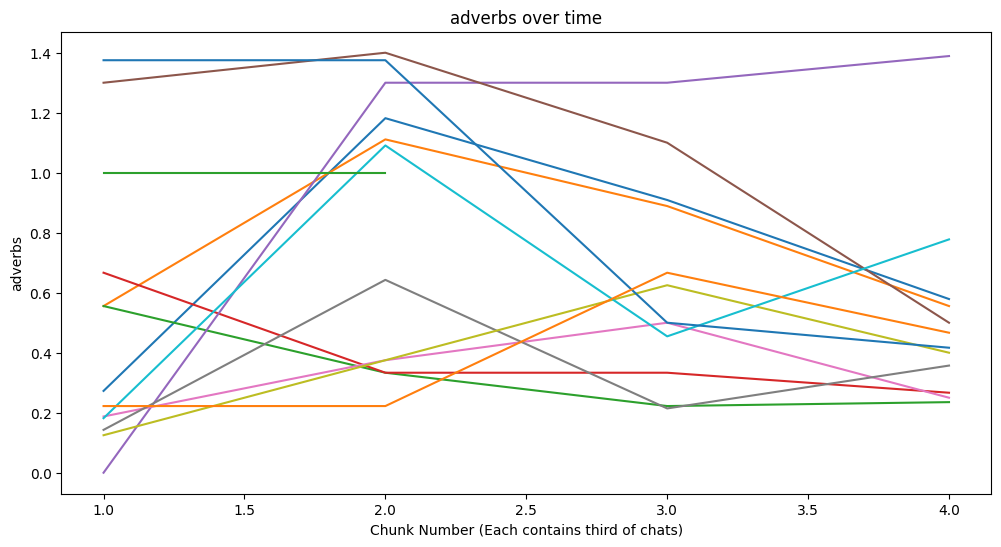

anxiety


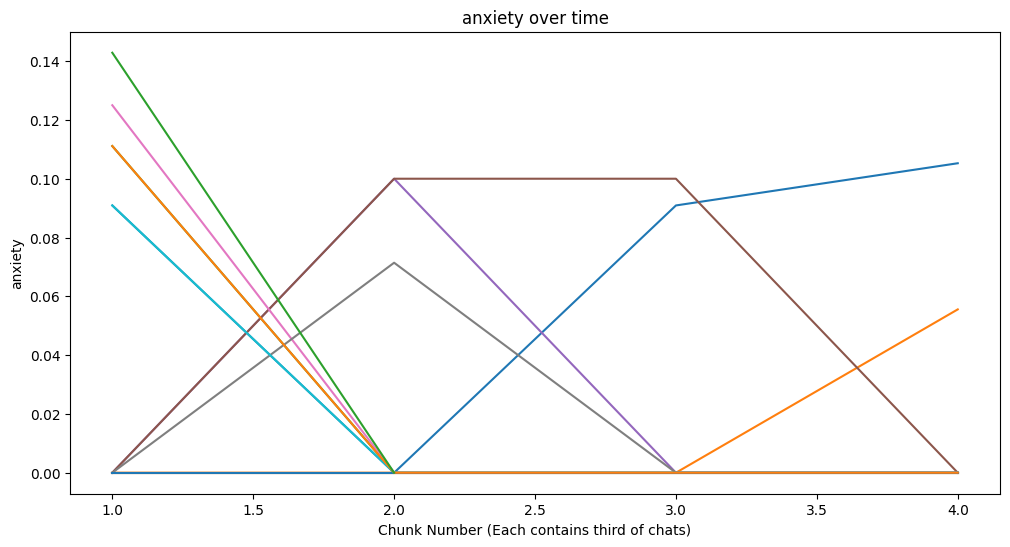

third_person


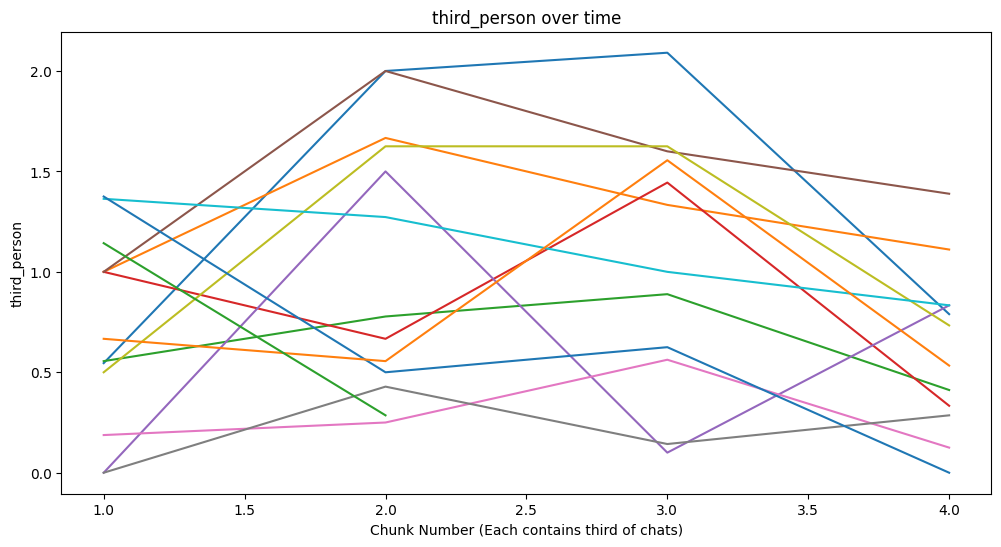

negation


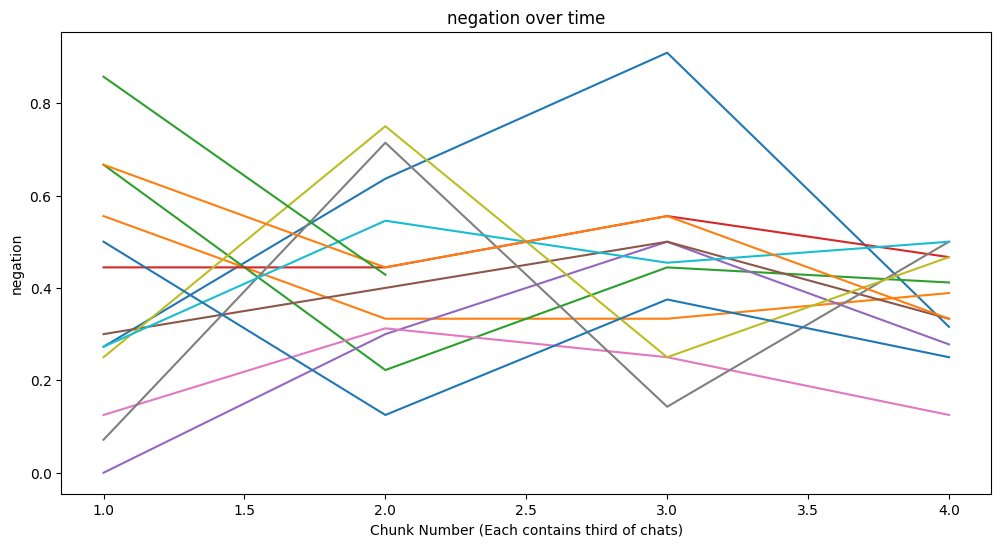

swear


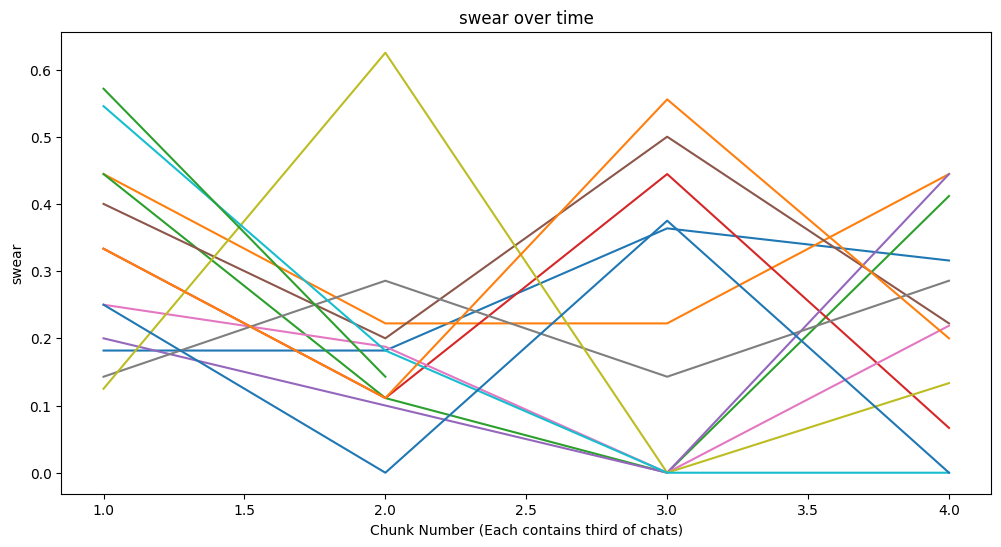

death


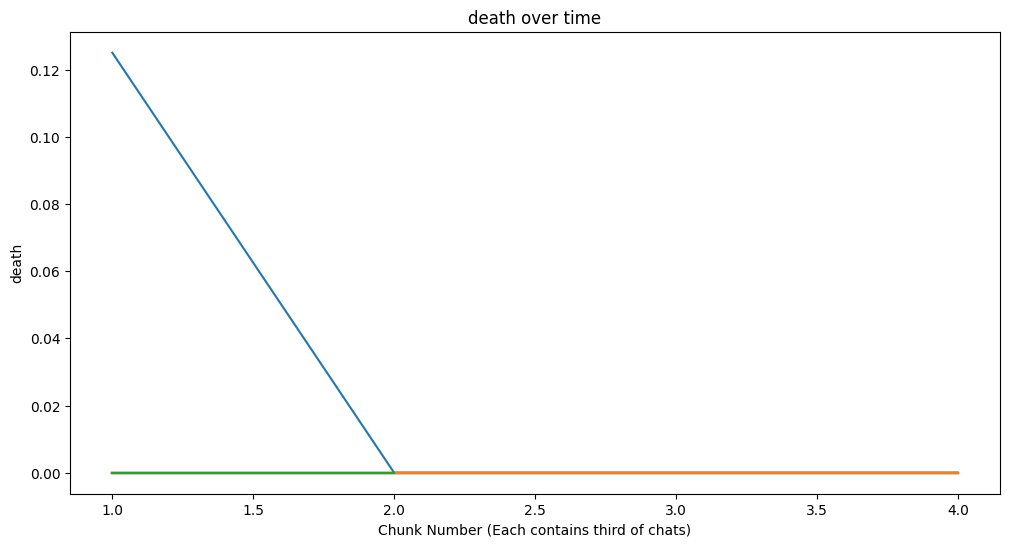

health


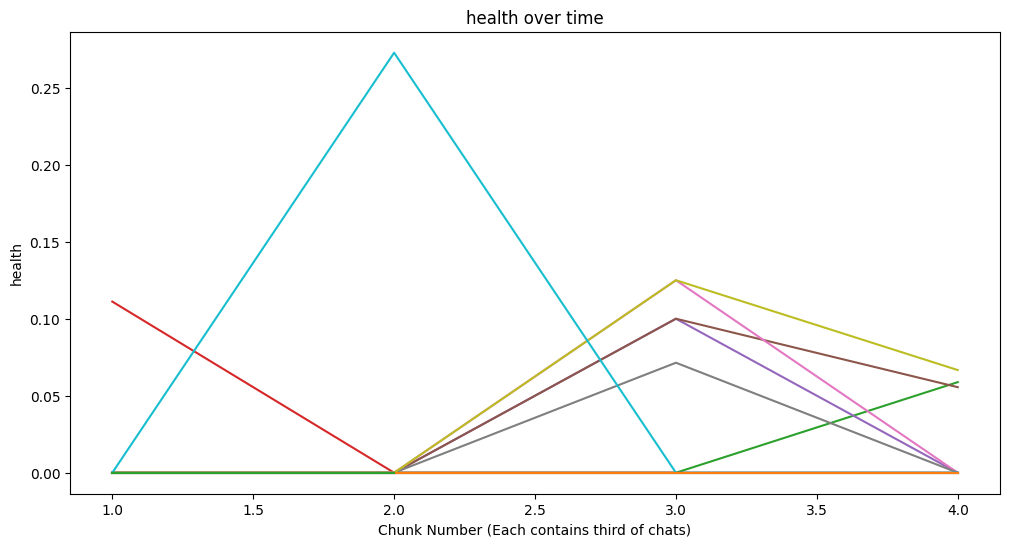

see


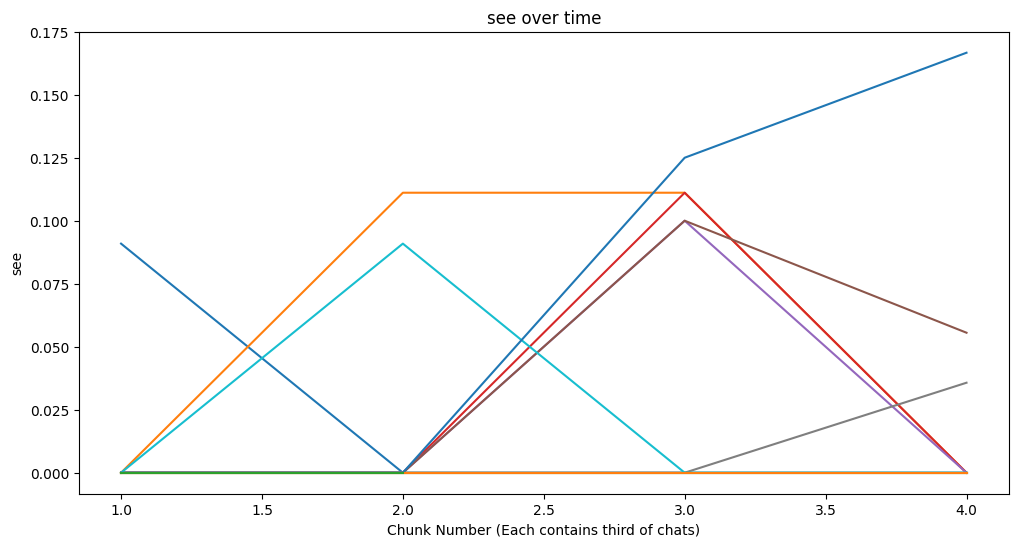

body


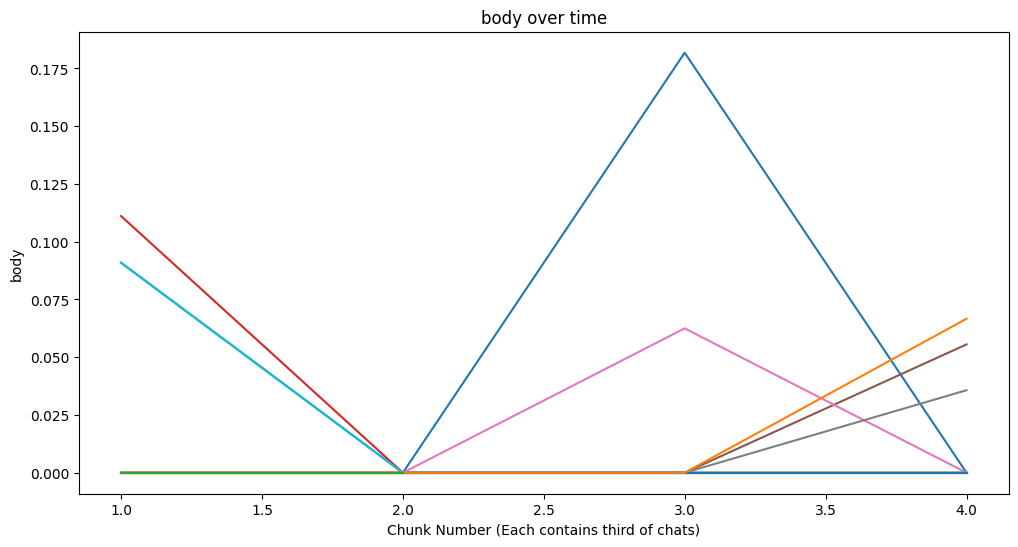

family


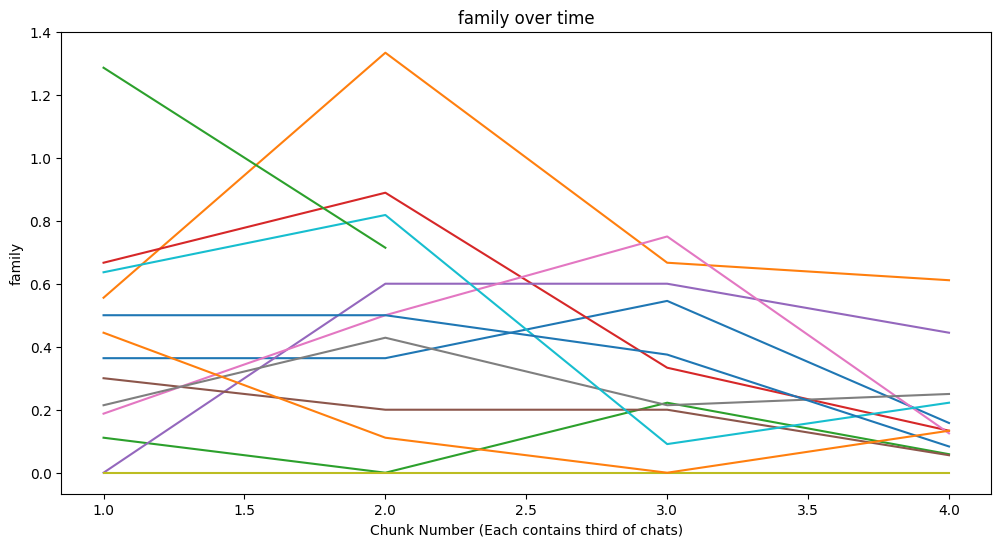

negative_affect


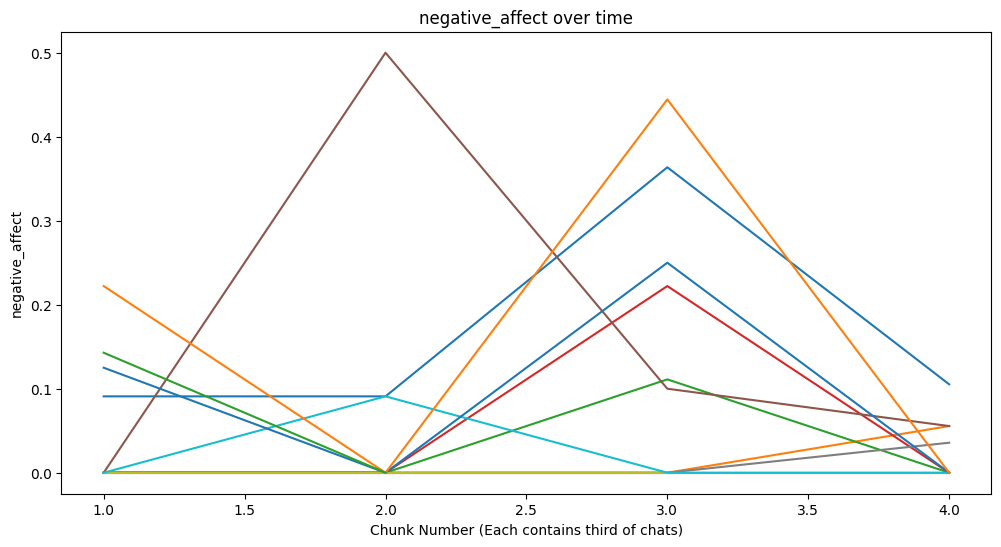

quantifier


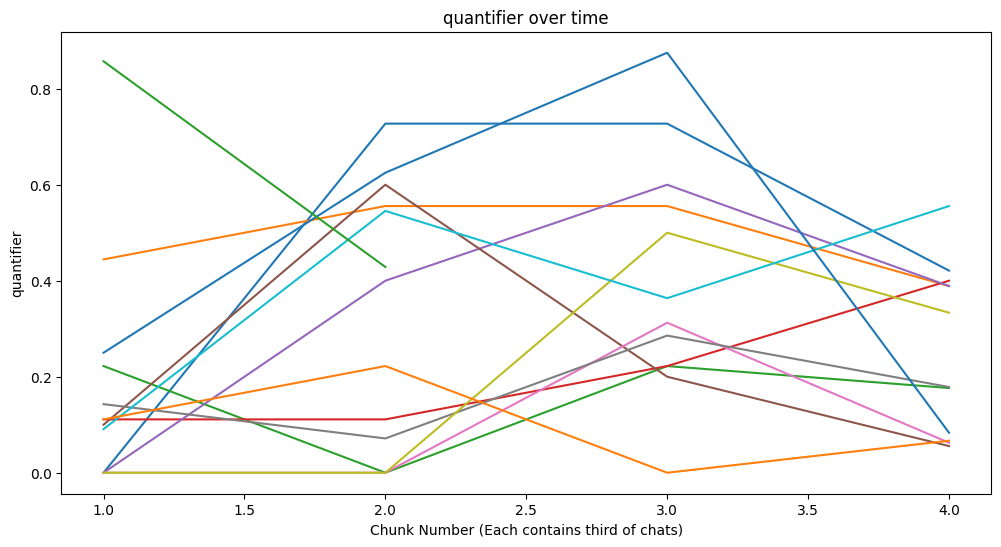

positive_affect


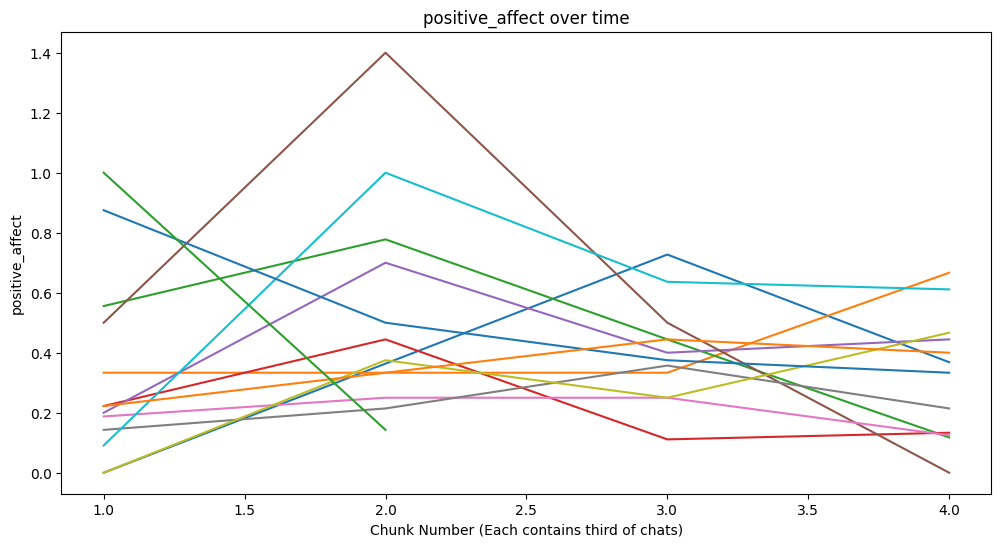

insight


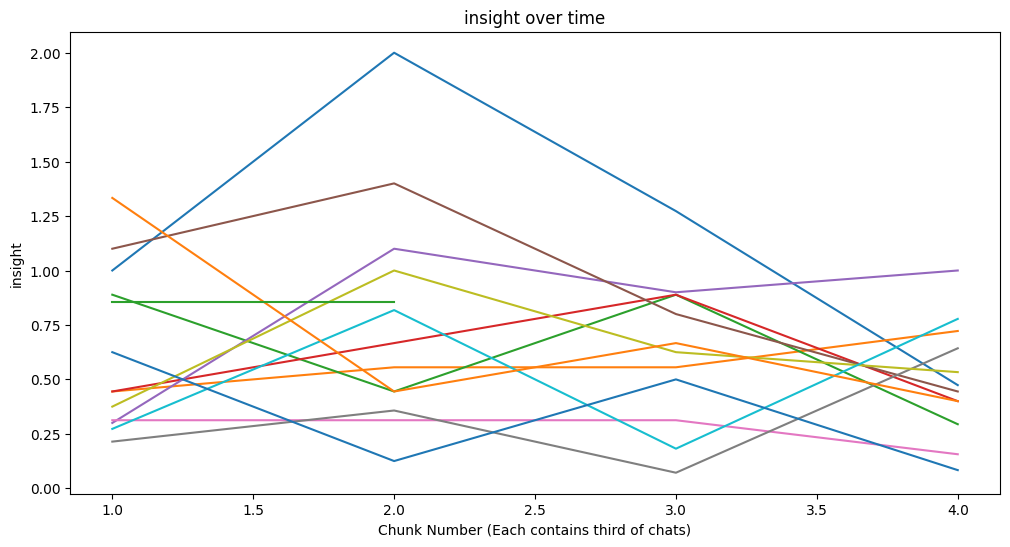

humans


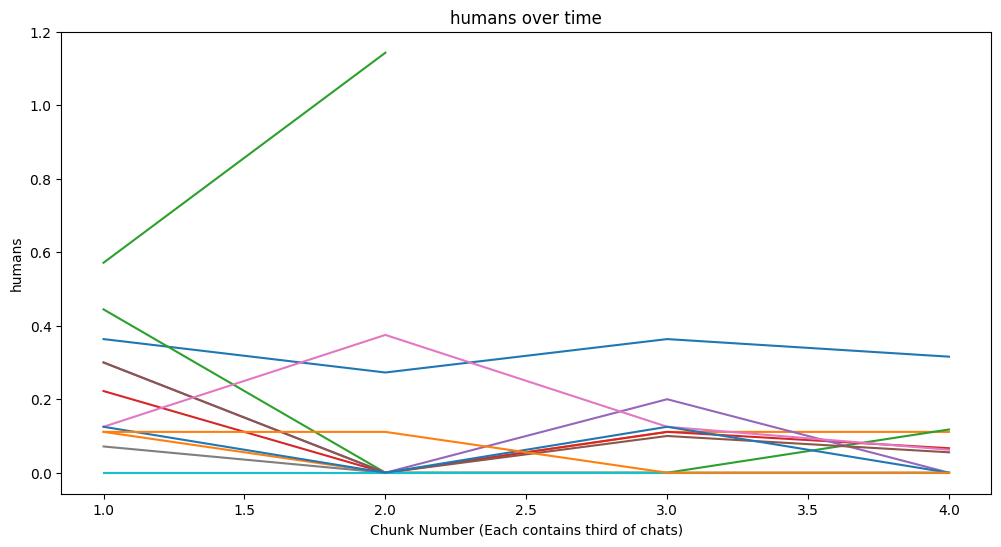

present_tense


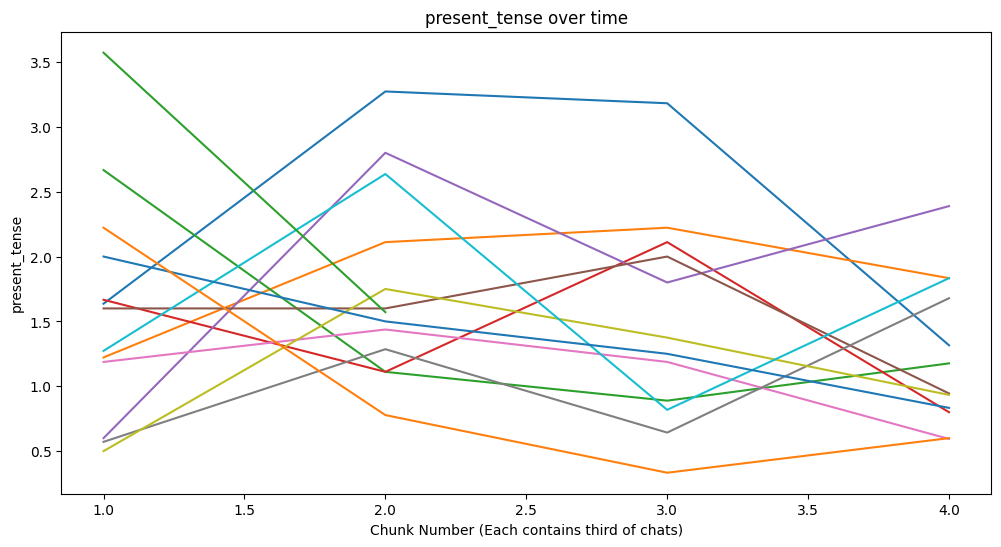

future_tense


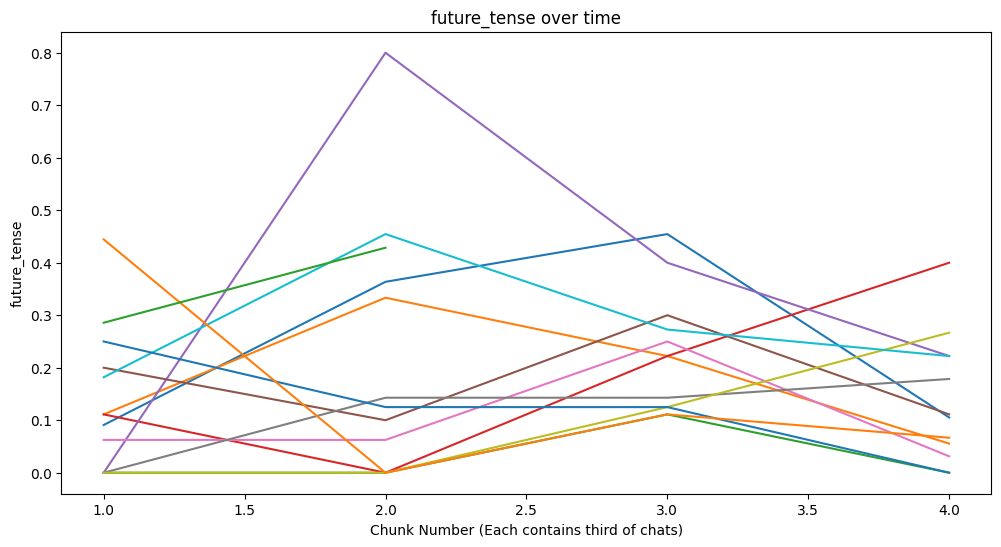

past_tense


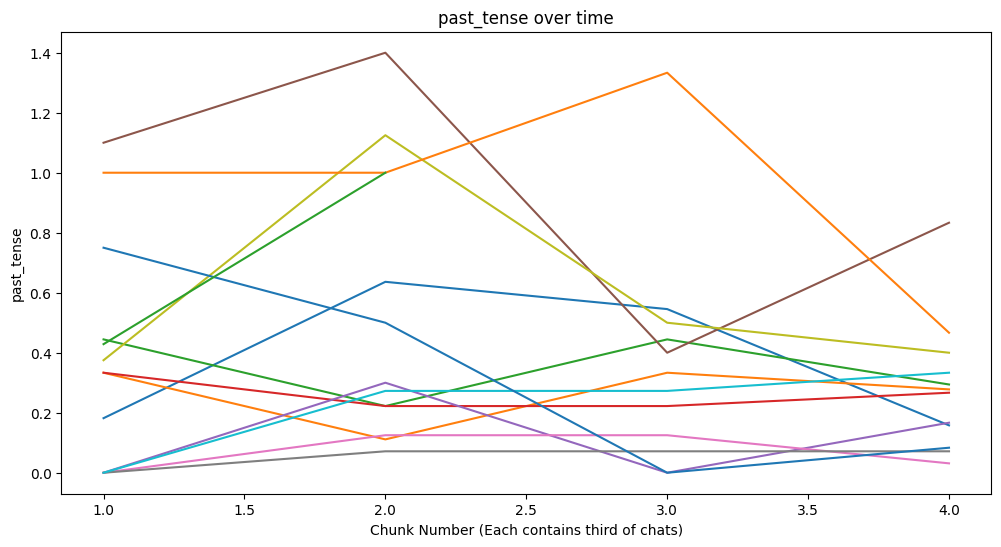

relative


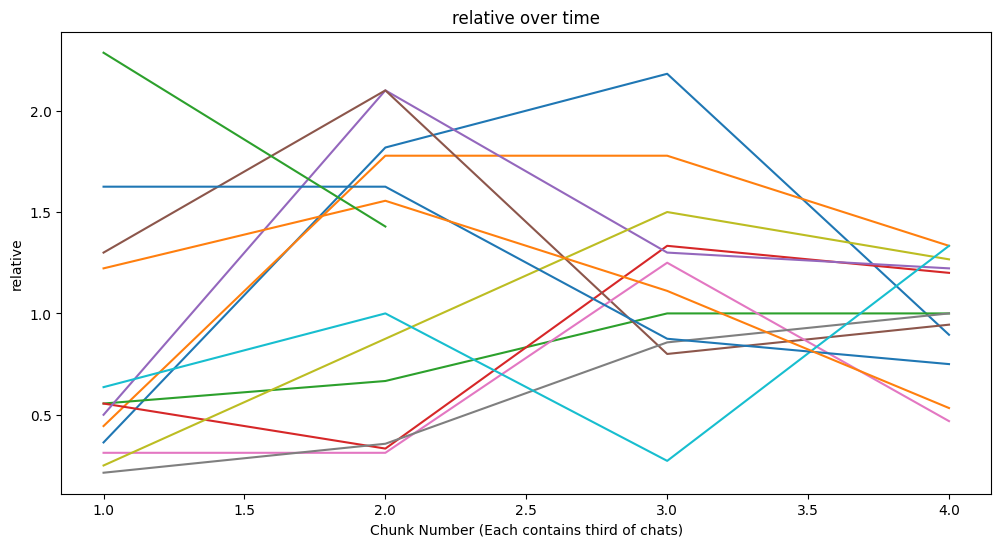

sexual


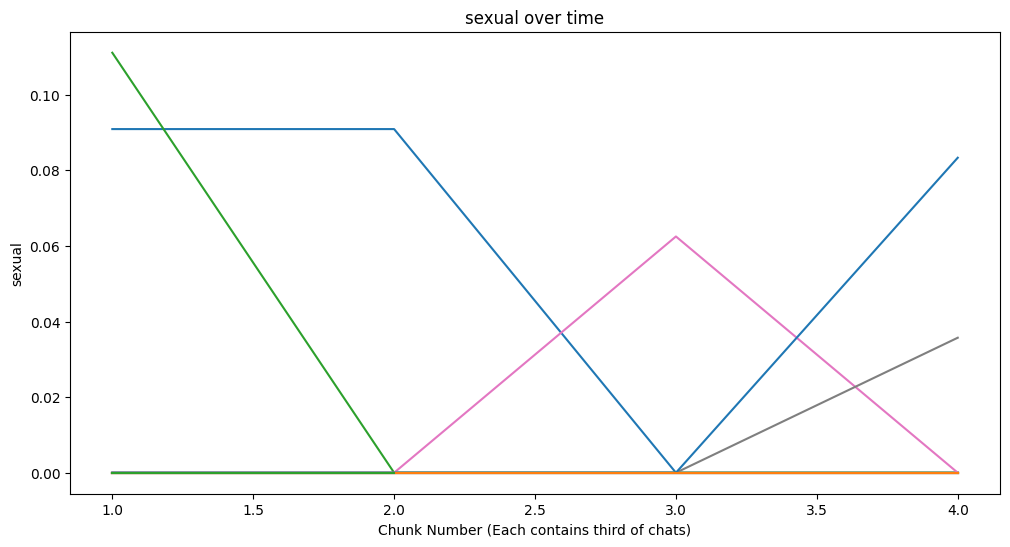

inhibition


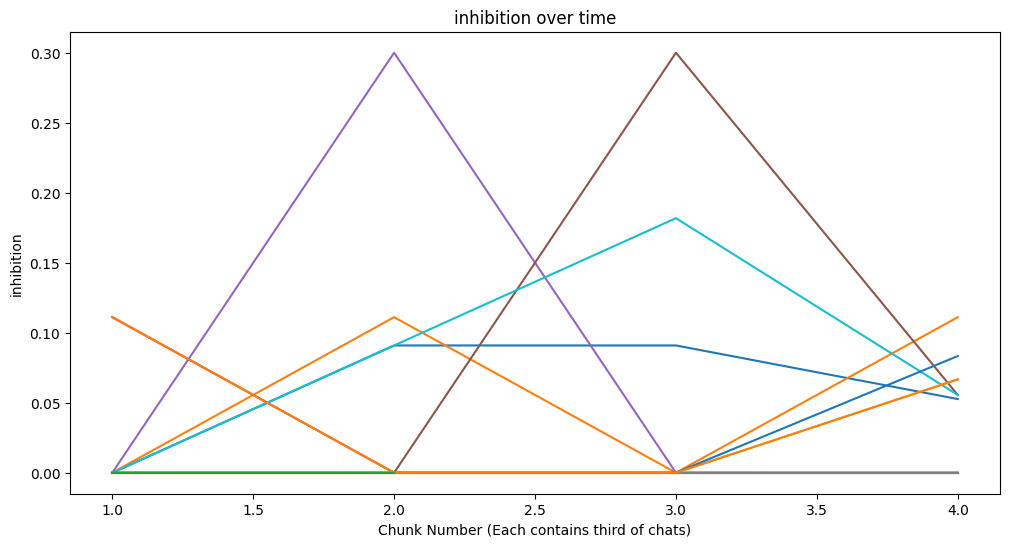

sadness


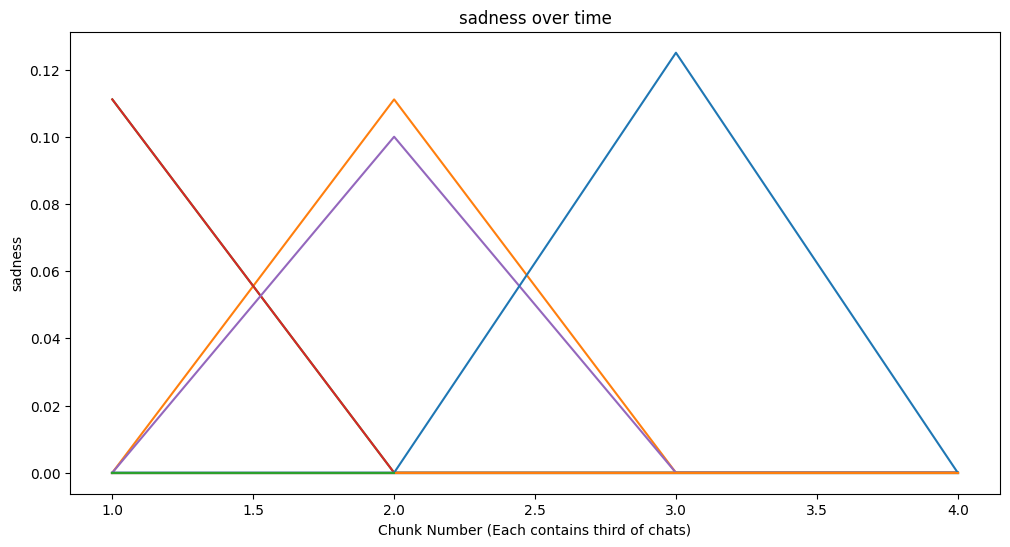

social


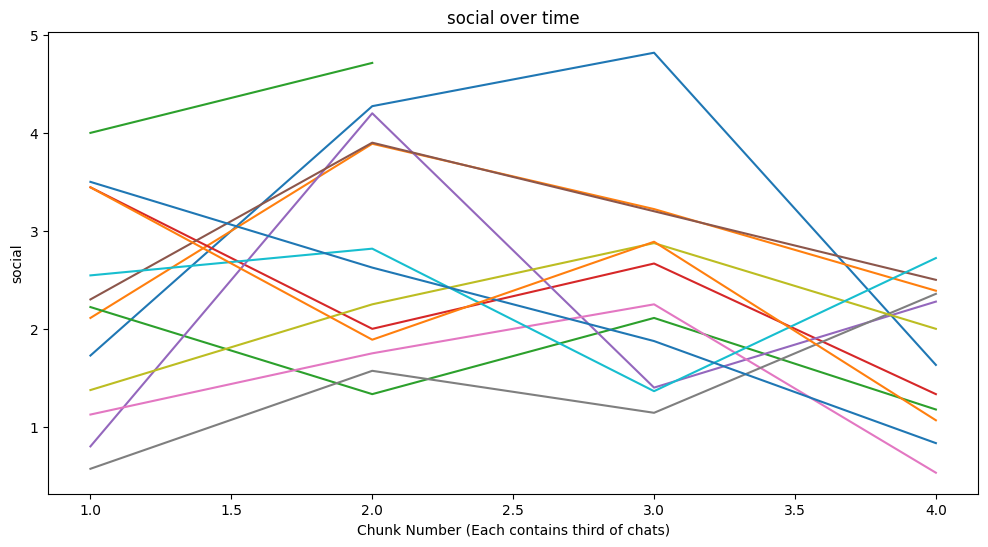

indefinite_pronoun


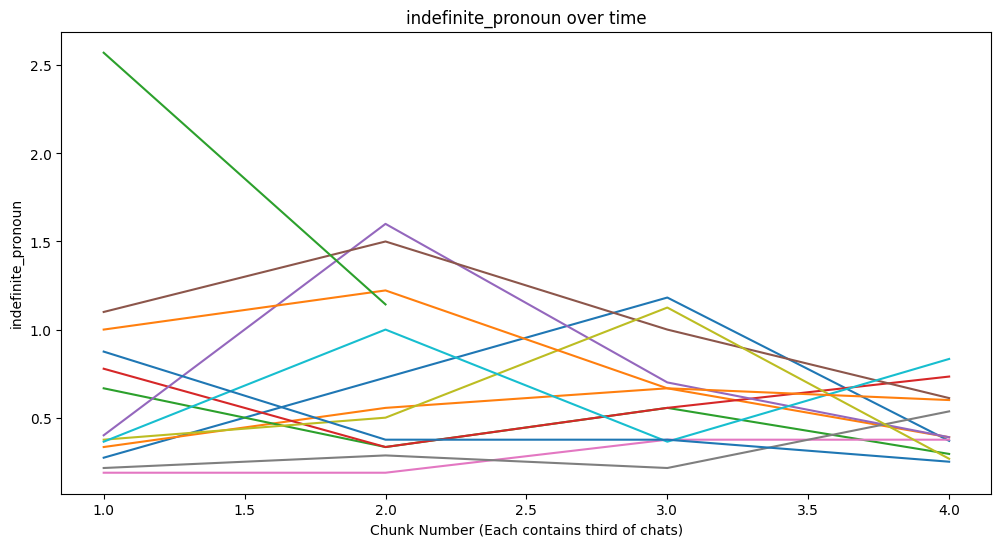

religion


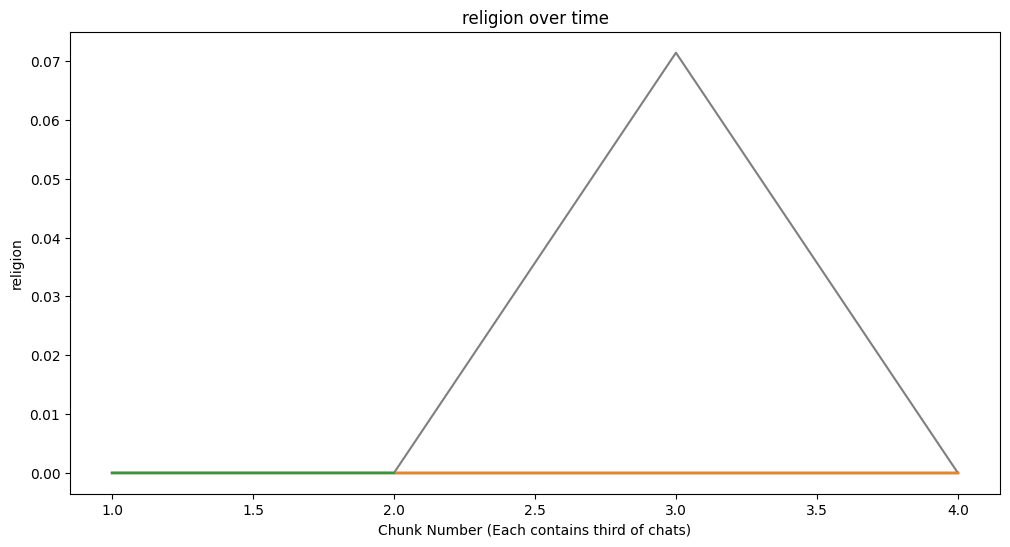

work


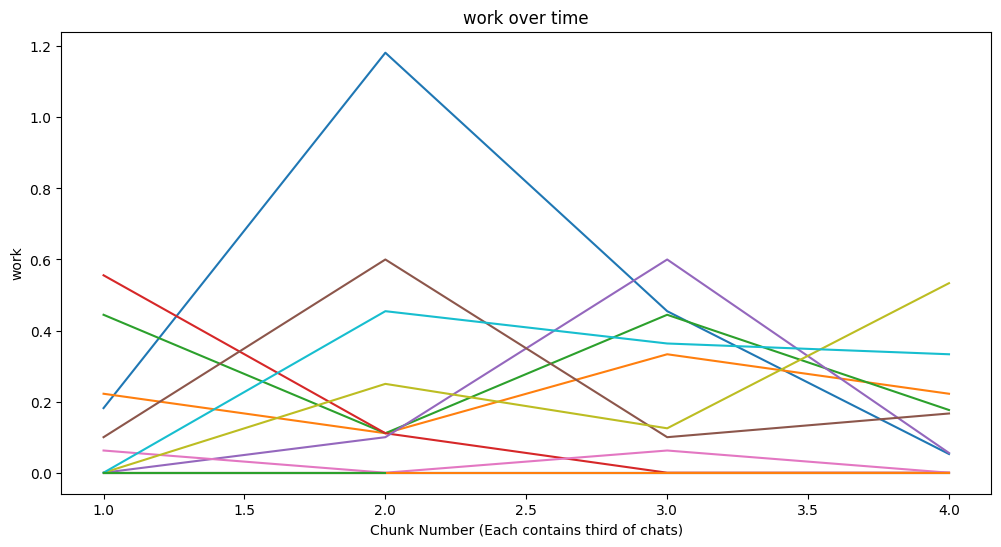

money


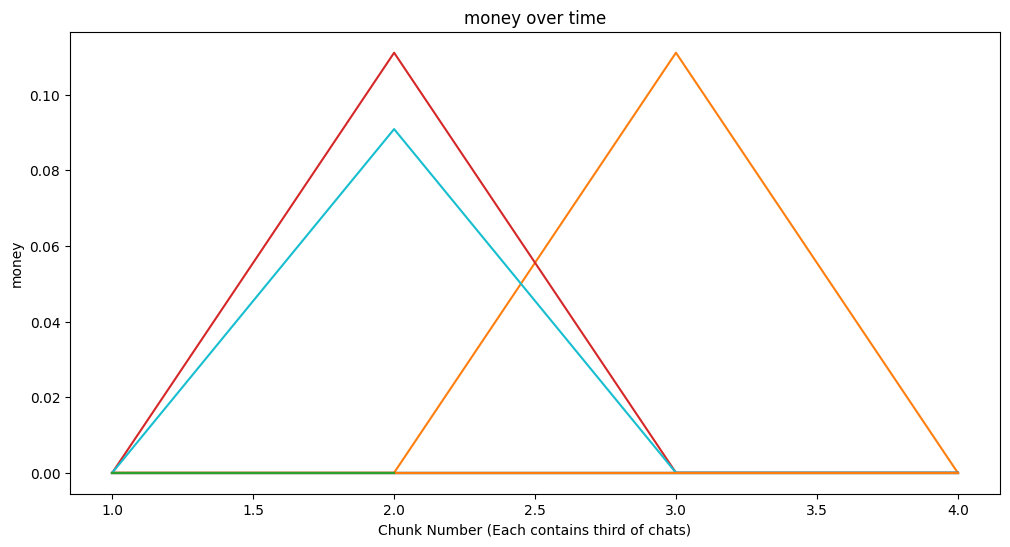

causation


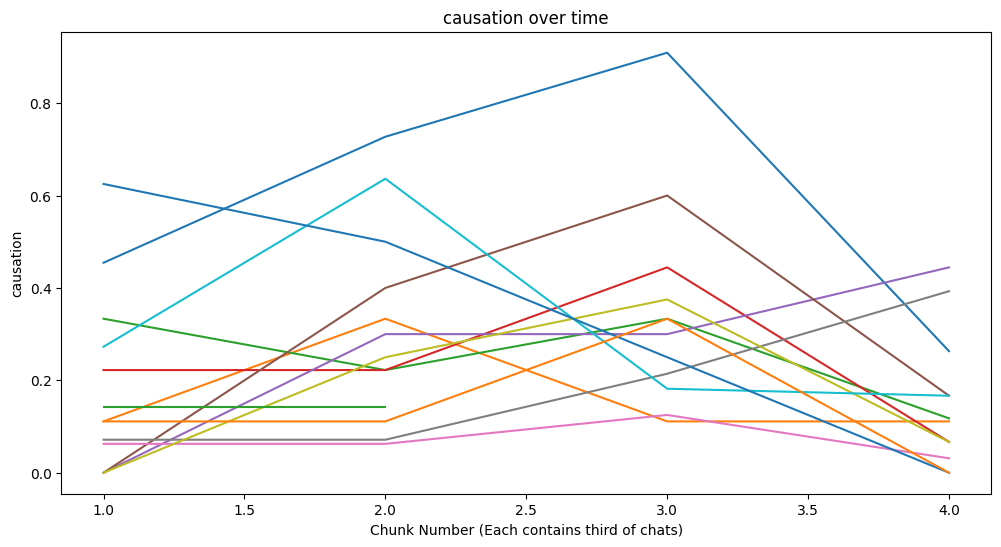

anger


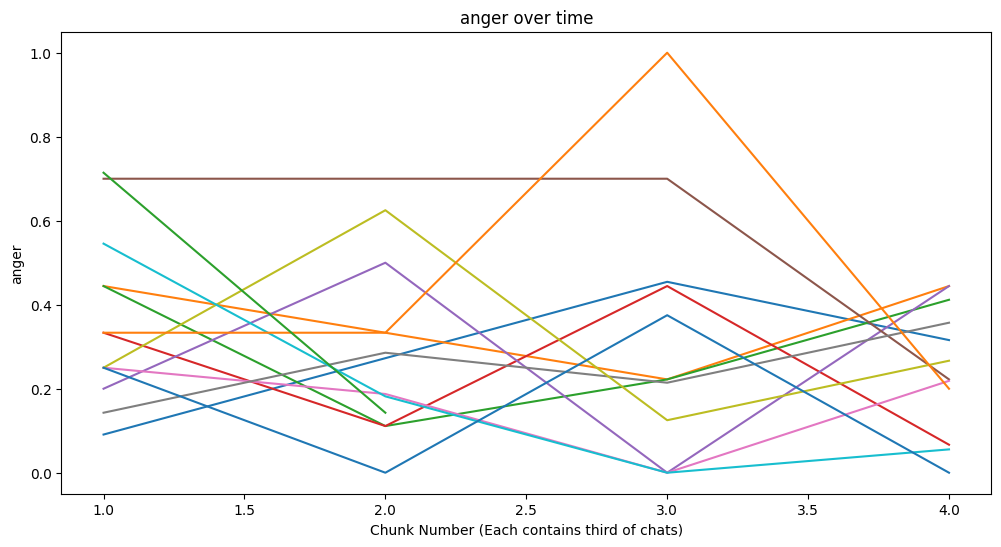

first_person_singular


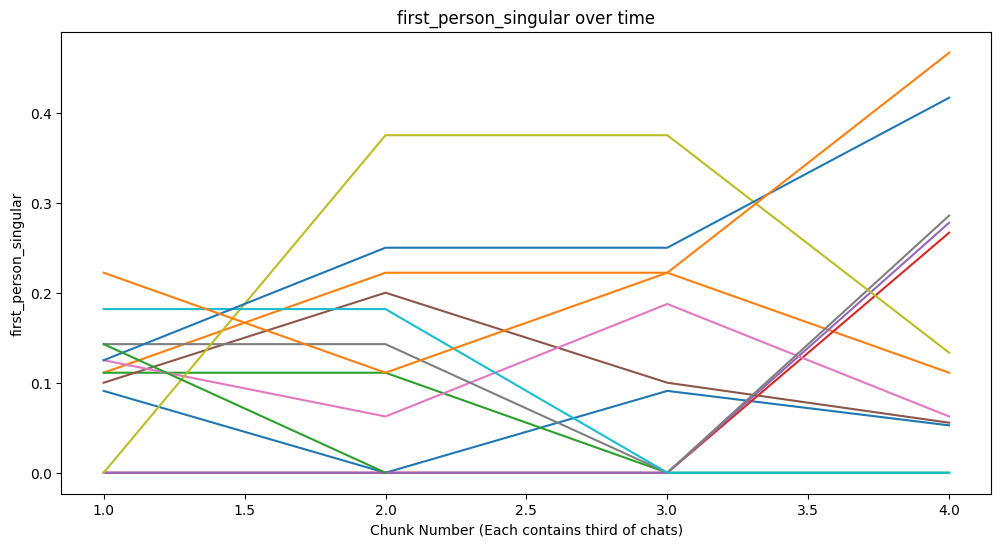

feel


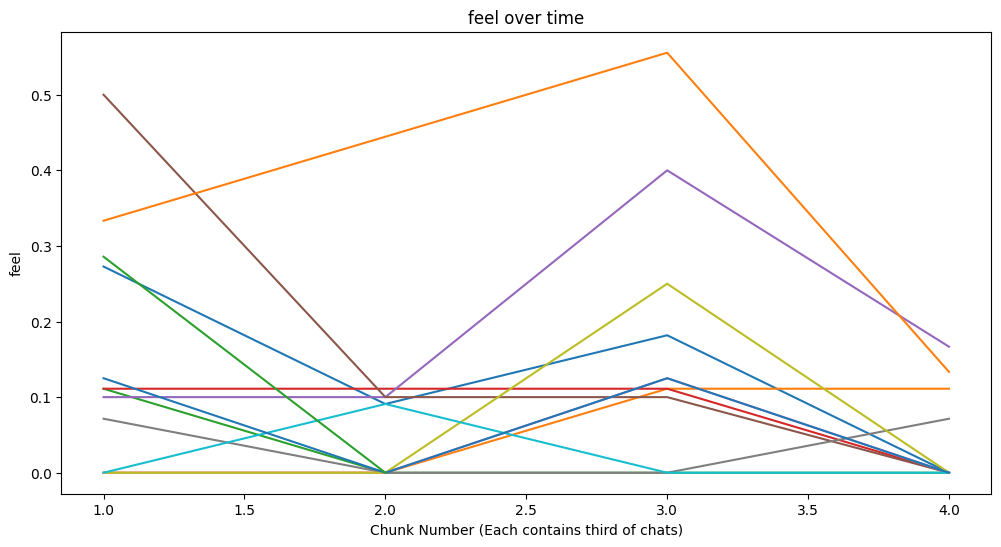

tentativeness


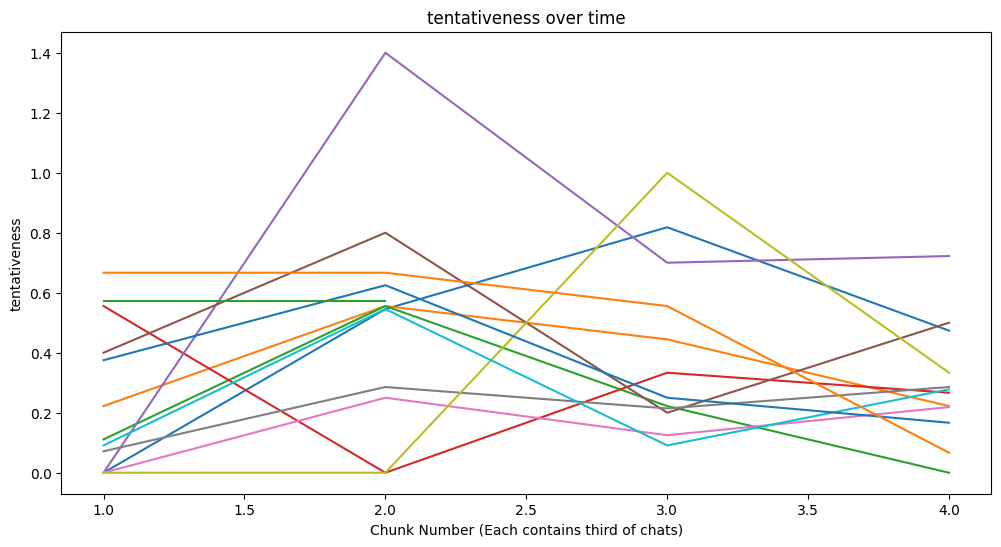

exclusive


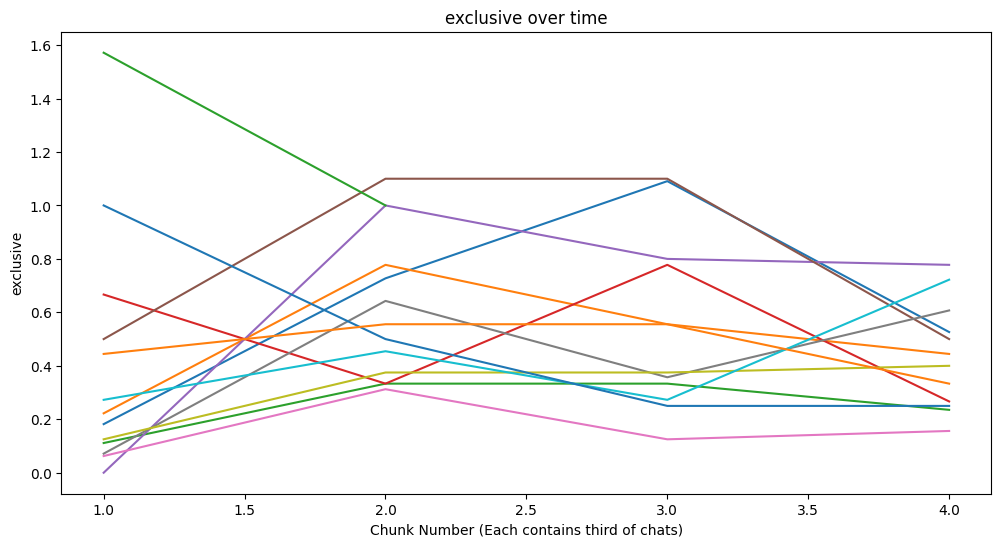

verbs


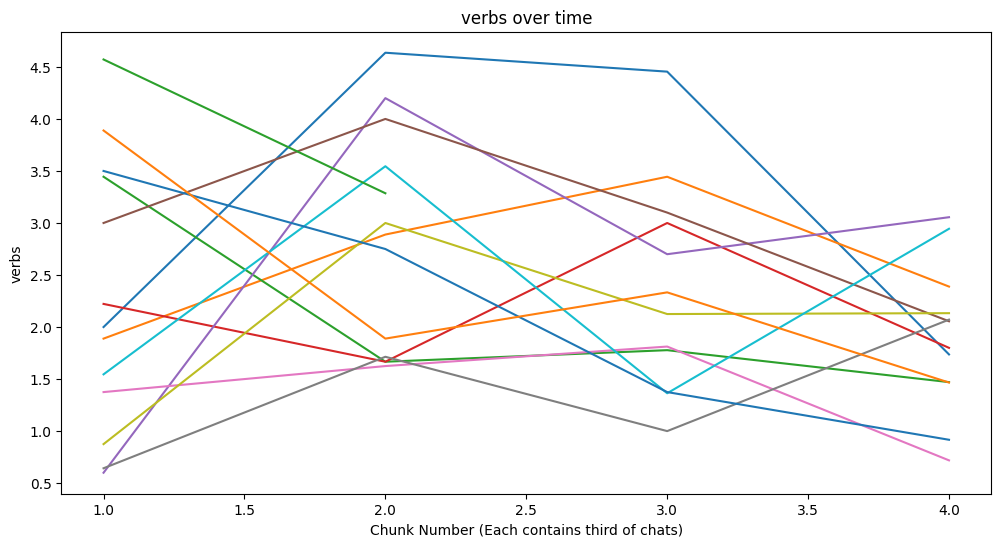

friends


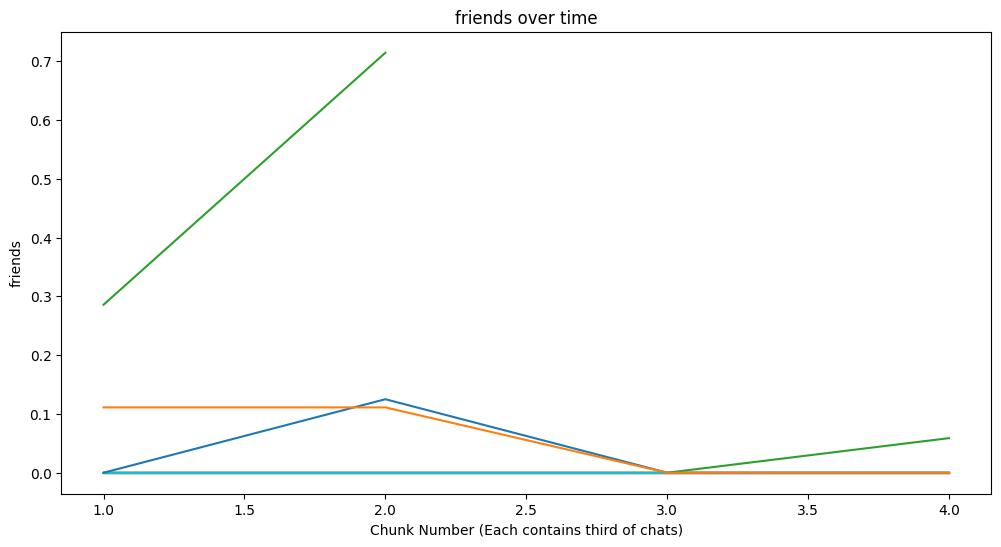

article


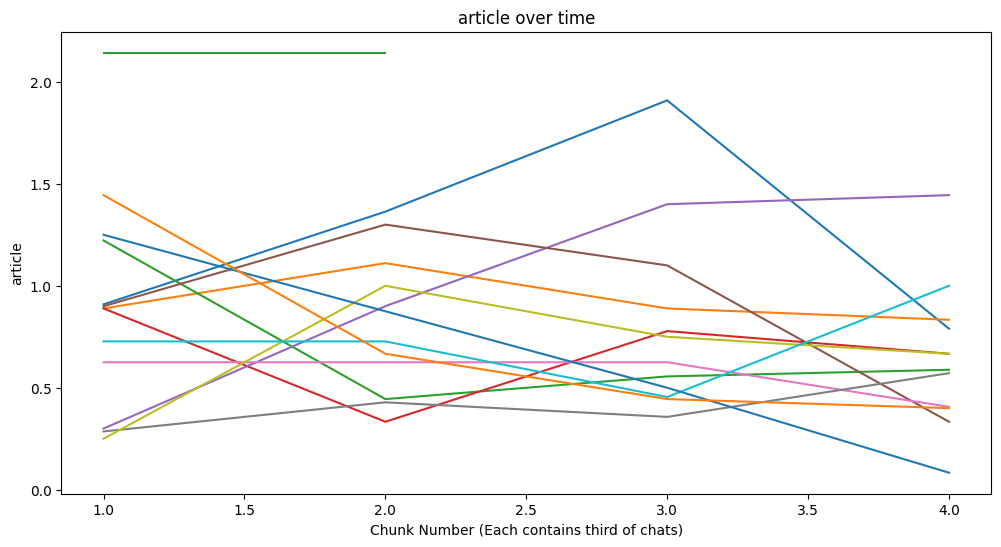

argue


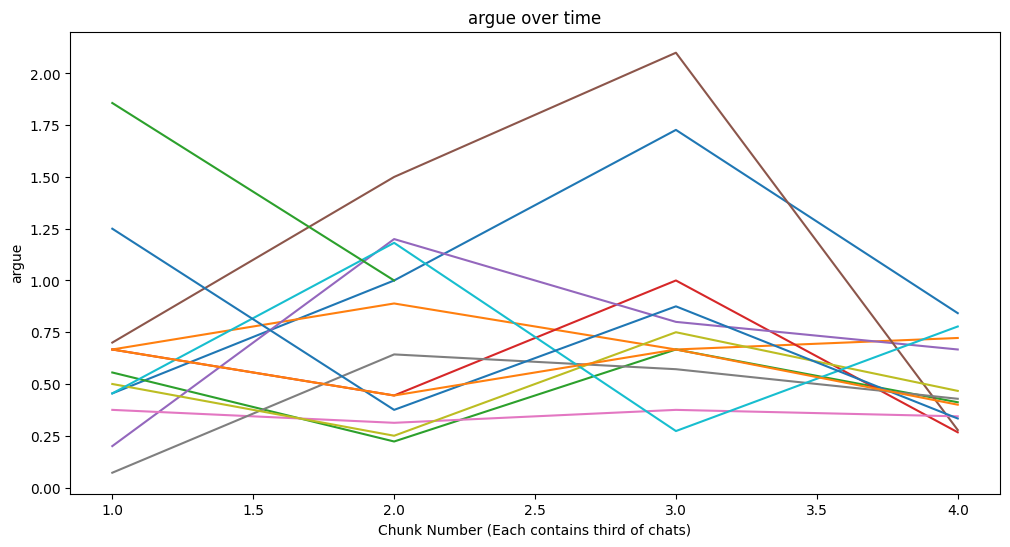

auxiliary_verbs


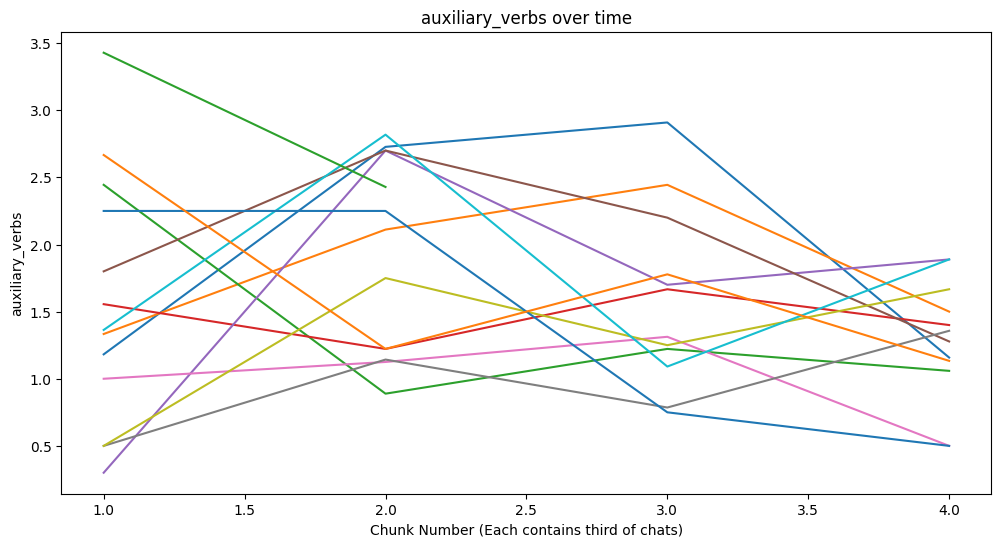

cognitive_mech


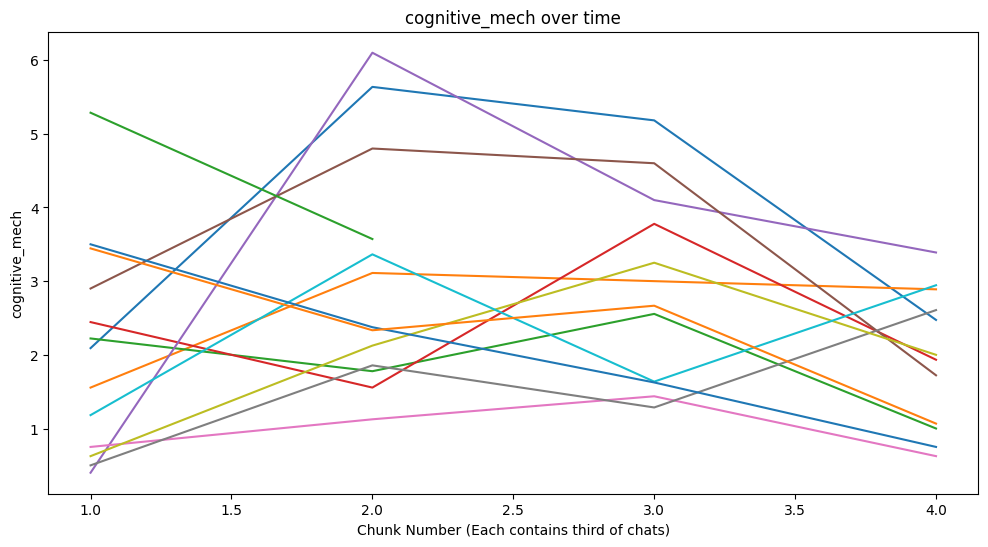

preposition


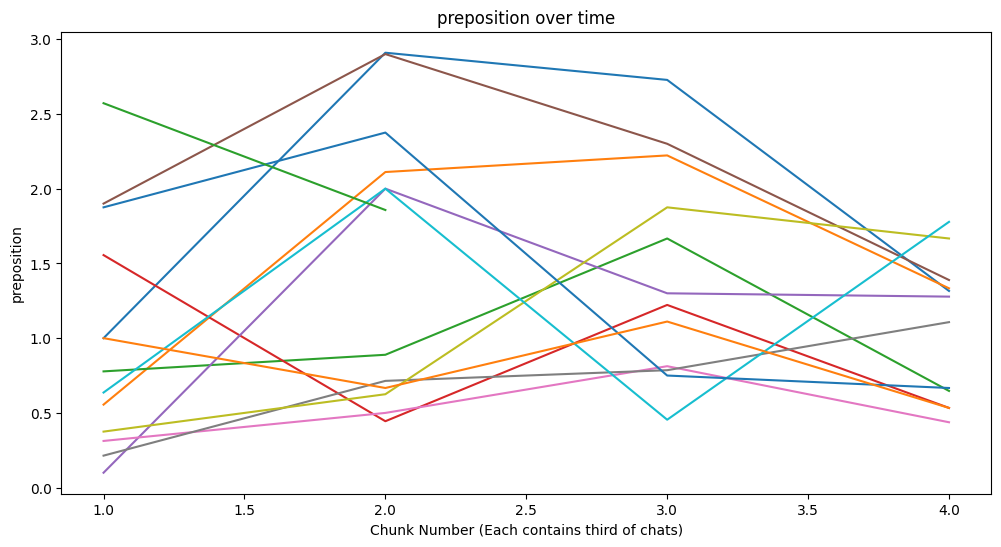

first_person_plural


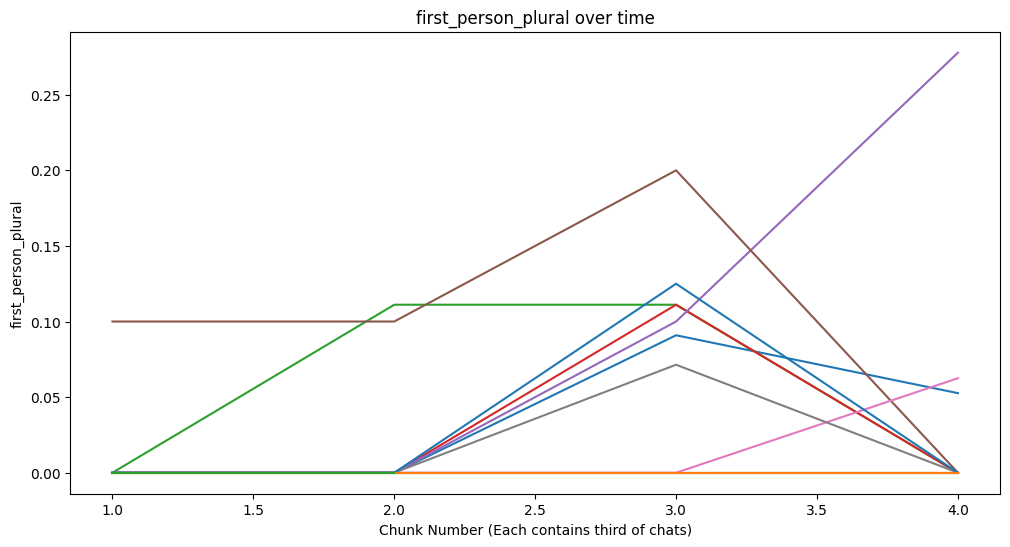

percept


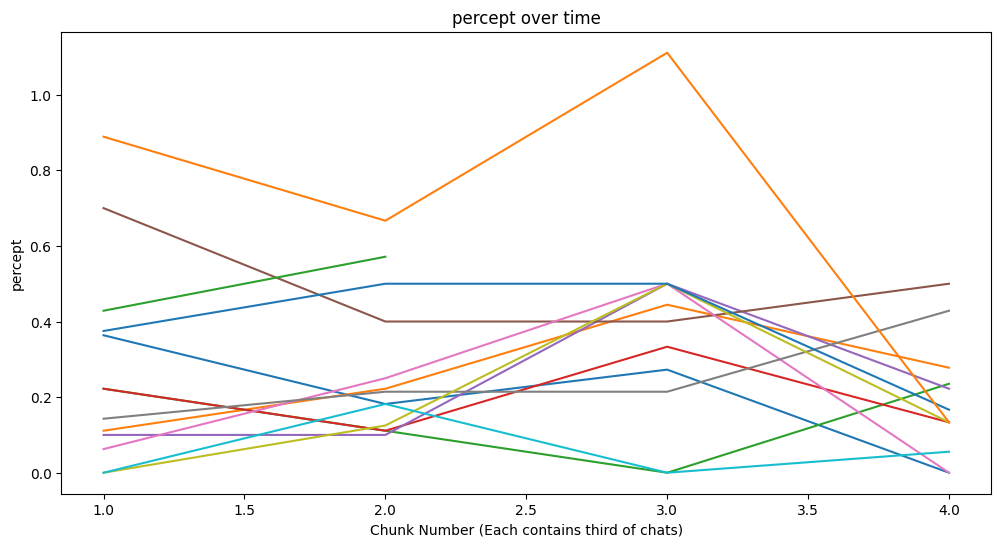

second_person


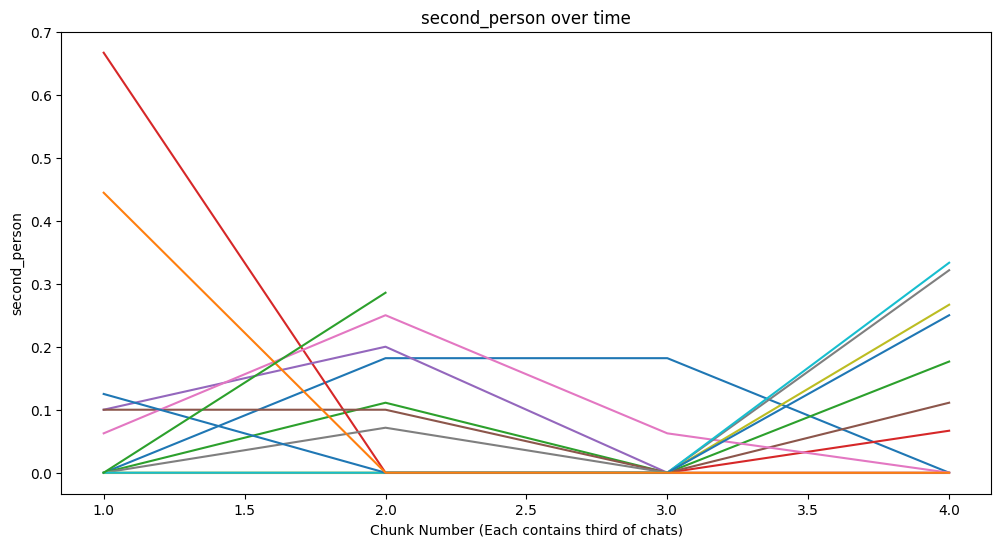

positive_words


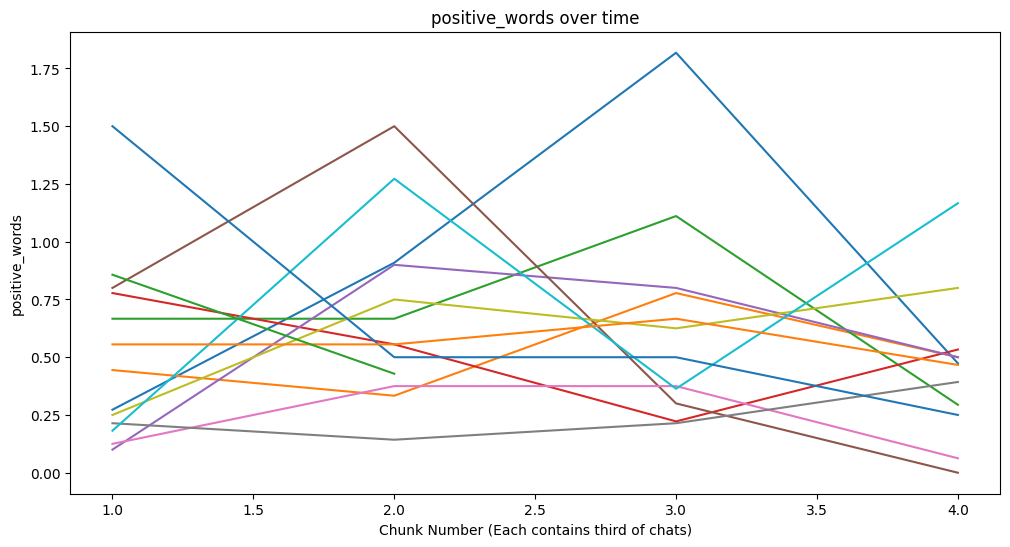

first_person


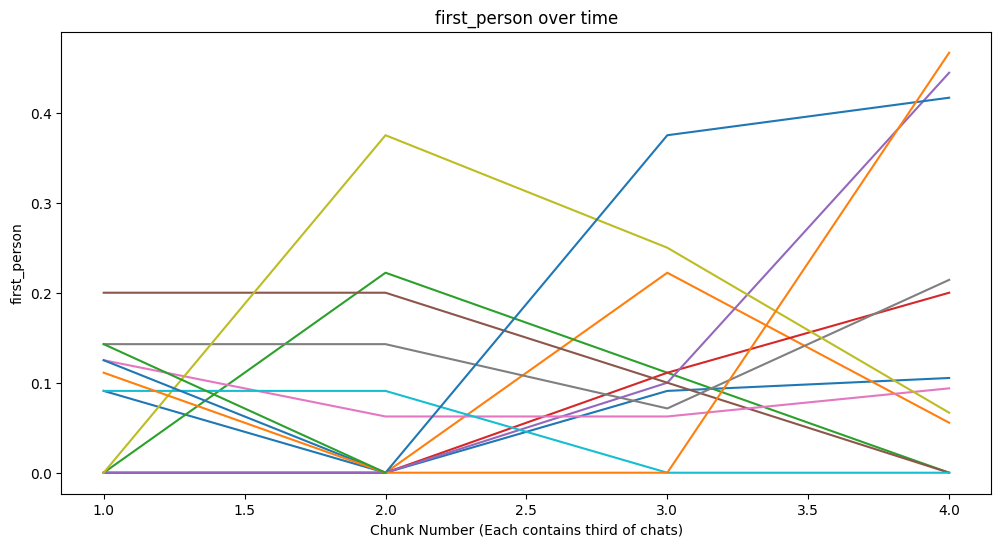

nltk_english_stopwords


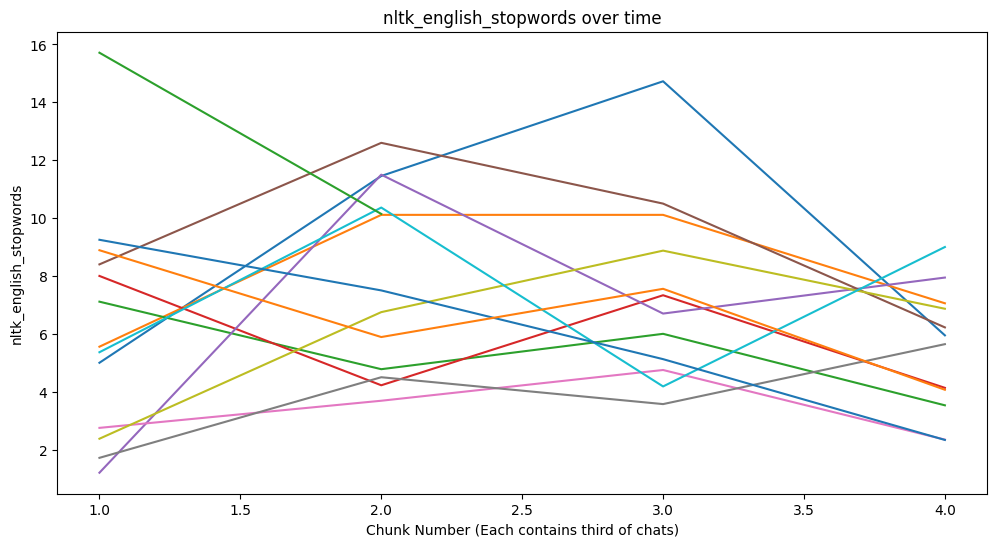

hedge_words


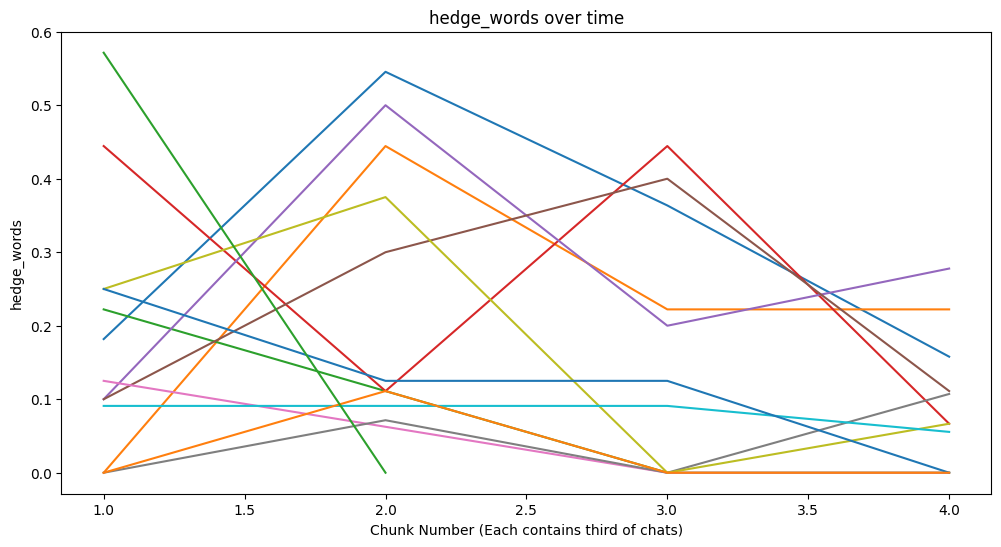

chunk_num_plt


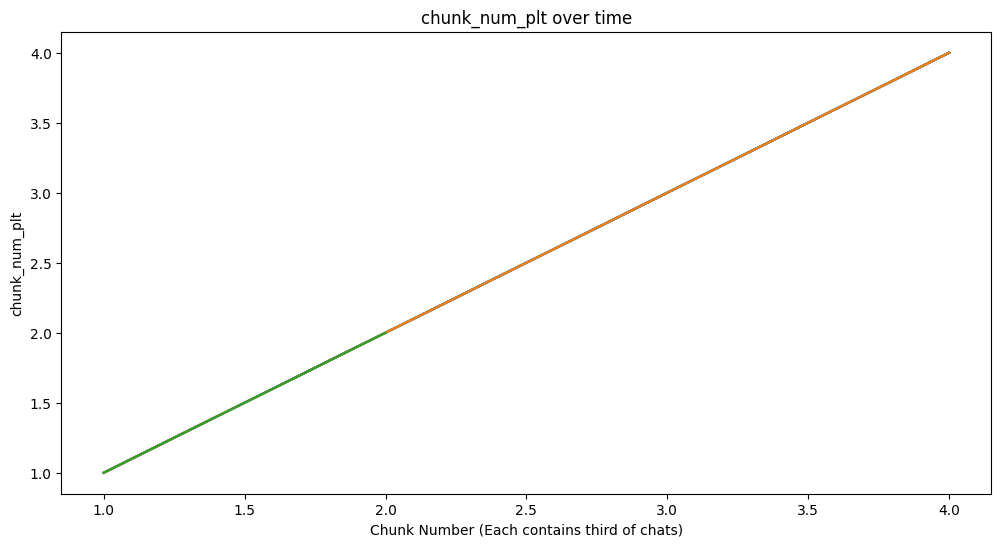

In [114]:
# liwc_0 = liwc_chunk_avg.loc[liwc_chunk_avg['conversation_num'] == 0.0]
smaller_liwc = liwc_chunk_avg[:50]
plot_dd_results(smaller_liwc)